<div style="text-align: center;">
    <h1 style="font-size: 50px; font-weight: bold;">CESI</h1>
    <h2 style="font-size: 30px;">Projet : ADEME</h2>
    <h2 style="font-size: 30px;">Année académique : [2024-2025]</h2>
    <h3 style="margin-top: 100px;">A3 FISE INFO</h3>
    <hr style="width: 60%; margin: auto;">
    <h1>Livrable 2 : Bloc Algorithmes et Optimisation</h1>
    <hr style="width: 60%; margin: auto;">
    <h4 style="margin-top: 200px;"> Etienne Tetssop et 2 autres membres</h4>
</div>

# Table des Matières

1. [Introduction](#Introduction)
   - Contexte
   - Objectif du livrable 
2. [Partie 1 : Modélisation Formelle](#partie-1--Modélisation-Formelle)
   - Repésentation des données
   - Variables décisionnelles
   - Fonction objectif
   - Contraintes
   - Choix des méthodes de résolution
   - Choix des méthodes Heuristiques
2. [Partie 2 : Analyse de la Complexité Théorique](#partie-1--Analyse-de-la-Complexité-Théorique)
   - Complexité du TSP
   - Complexité VRP
   - Algorithmes de Résolution
2. [Partie 3 : Modélisation](#partie-1--modélisation)
   - Description
   - Modèle formelle
   - Analyse de la complexité
   - Méthodologie
3. [Partie 4 : Implémentation](#partie-2--implémentation)
   - Implémentation
   - Exploitation
4. [Conclusion](#conclusion)
   - Résumé
5. [Glossaire](#Glossaire)
6. [Bibliographie](#Bibliographie)


---

## <span style="color:#D9F0FF">Introduction </span>

### <span style="color:#99C8F8">Contexte</span>

Dans le cadre d’un appel à manifestation d’intérêt lancé par l'ADEME, notre équipe de recherche opérationnelle au sein de CesiCDP se concentre sur la conception et l'optimisation de nouvelles solutions de mobilité pour le transport des marchandises. L’objectif est de résoudre un problème de tournée de livraison avec différentes contraintes pour minimiser les coûts et les impacts environnementaux.
Le transport de marchandises est un enjeu majeur dans les systèmes logistiques actuels. L’optimisation des tournées de livraison, en prenant en compte les conditions de circulation, la capacité des véhicules, et les contraintes liées à des fenêtres de temps, permet de réaliser des économies substantielles et de réduire l’empreinte écologique.

### <span style="color:#99C8F8">Objectif du projet</span>

L’objectif de notre étude est de modéliser et de résoudre un problème de tournée de livraison. Plus précisément, le problème consiste à : 

* Déterminer un ensemble de tournées de camions qui relient plusieurs points de livraison à partir d'un dépôt central ; 

* Minimiser le temps total de ces tournées ; 

* Prendre en compte des contraintes supplémentaires, par exemple telles que des : 
    * Fenêtres temporelles ; 

    * Variations de trafic en fonction de l'heure ; 

    * Routes à sens unique ; 

    * Capacité limitée des véhicules ; 

    * Routes de distances et vitesses limites différentes ; 

    * Aléas de la route comme des accidents et des travaux.

---

## <span style="color:#D9F0FF">Modélisation-Formelle</span>

### <span style="color:#99C8F8">Repésentation des données</span>

Le problème peut être modélisé sous forme de graphe orienté G = (V,E), où :
* V représente l’ensemble des nœuds ou points de livraison,  $V_0$ étant le dépôt central ;
* E représente l’ensemble des arêtes du graphe, correspondant aux routes entre les villes. Chaque arête ⅇ∈E est associée à deux paramètres :
    * ⅆ(ⅇ) : la distance entre les points i et j ;
    * v(ⅇ) : la vitesse théorique sur cette route.

Le temps pour parcourir une arête dépend de ces deux paramètres et peut être exprimé comme : 
$$
t(e) = \frac{d(e)}{v(e)}
$$

* Le trafic et les événements aléatoires (accidents ou travaux) sont également modélisés dynamiquement, en désactivant temporairement certains sommets ou arêtes du graphe pendant l'exécution de la tournée.

Chaque camion dispose une caractéristique K représentant le nombre maximal de camion disponibles.

### <span style="color:#99C8F8">Variables décisionnelles</span>

* $x_{ij}$ : variable binaire valant 1 si la tournée passe par la route allant du point i au point j, et 0 sinon ;

* $t_{ij}$ : le temps pour parcourir la route entre i et j dépendant de la distance $d_{ij}$ et de la vitesse $v_{ij}$ :
$$
t_{ij} = \frac{d_{ij}}{v_{ij}}
$$


* $T_k$ : temps total de la tournée du camion k, qui correspond à la somme des temps de parcours sur les arêtes empruntées ;

$$
T_k = \sum_{(i,j) \in E} \frac{d_{ij}}{v_{ij}} \cdot x_{ij}
$$


* $D_k$ : la distance totale parcourue par le camion 𝑘, calculée comme la somme des distances sur les arêtes empruntées.
$$
D_k = \sum_{(i,j) \in E} \delta_{ij} \cdot x_{ij}
$$

### <span style="color:#99C8F8">Fonction objectif</span>

L'objectif est de minimiser à la fois le temps total des tournées et la distance totale parcourue. Nous pouvons introduire deux coefficients, α et β, pour contrôler respectivement l'importance du temps et de la distance dans l'optimisation globale.
La fonction « objectif » s'écrit alors :
$$
\min \sum_{k=1}^{K} \left( \alpha \cdot T_k + \beta \cdot D_k \right)
$$

où :
* $T_k$ est le temps total de la tournée du camion k, calculé à partir des distances $d_{ij}$ et des vitesses $v_{ij}$ sur les arêtes empruntées ;
* $D_k$ est la distance totale parcourue par le camion k ;
* α est un coefficient qui contrôle l'importance du temps total dans l'optimisation ;
* β est un coefficient qui contrôle l'importance de la distance totale dans l'optimisation.

Cette approche permet d'introduire une flexibilité dans l'optimisation. Par exemple, en choisissant α > β, on accorde plus d'importance à la minimisation du temps de parcours, tandis que β > α privilégierait la minimisation de la distance totale.



### <span style="color:#99C8F8">Contraintes</span>

#### <span style="color:#7489DB">Contraintes de trafic (accidents ou travaux)</span>

Les événements aléatoires comme des accidents ou des travaux peuvent survenir sur certaines routes ou à certains points de livraison. Cela entraîne la désactivation temporaire de certains sommets ou arêtes dans le graphe.
* Un accident peut désactiver un sommet v, rendant ce point de livraison temporairement inaccessible.
* Des travaux peuvent désactiver une arête $(i,j)$, empêchant le passage par cette route.
On modélise cette contrainte de manière dynamique. Pendant l'exécution de la tournée, si un événement survient, le sommet ou l’arête concerné(e) est retiré(e) du graphe :

* Si un sommet v est désactivé : 
$x_{ij}=0$  ∀j tel que v=ⅈ
* Si une arête (i,j) est désactivée : 
$x_{ij}=0$ pour cette arête spécifique

Cela oblige l'algorithme à recalculer la tournée en tenant compte de ces changements dynamiques.

#### <span style="color:#7489DB">Poids des arêtes (distance et vitesse)</span>

Chaque arête (i,j)∈E du graphe est associée à deux poids :
* $d_{ij}$ : la distance en kilomètres entre les points i et j,
* $v_{ij}$ : la vitesse théorique (en km/h) que le camion peut atteindre sur cette arête, dépendant des conditions de route.
Ces deux poids nous permettent de calculer à la fois la distance totale parcourue et le temps de livraison théorique pour chaque tournée.

Calcul du temps de parcours.

Le temps de livraison théorique sur une arête (i,j) est donné par :
$$
t_{ij} = \frac{\delta_{ij}}{v_{ij}}
$$

Le temps total pour une tournée réalisée par un camion est alors :
$$
T_k = \sum_{(i,j) \in E} \frac{\delta_{ij}}{v_{ij}} \cdot x_{ij}
$$

Calcul de la distance totale
La distance totale parcourue par un camion est donnée par la somme des distances sur chaque arête empruntée :
$$
D_k = \sum_{(i,j) \in E} \delta_{ij} \cdot x_{ij}
$$

#### <span style="color:#7489DB">Contraintes sur le nombre de camion </span>

La contrainte sur le nombre de camions disponibles signifie que nous avons une limite sur le nombre K de camions qui peuvent être utilisés simultanément pour effectuer les livraisons.
* Chaque camion doit partir du dépôt, effectuer une tournée de livraison, puis revenir au dépôt.
* Le nombre total de tournées ne peut pas dépasser K, le nombre maximum de camions disponibles.
$$
\sum_{k=1}^{K} T_k
$$
 

où $T_k$ est la tournée réalisée par le camion k.

Cette contrainte impose que :

$K_min≤K≤K_max$ 

Où $K_min$ est le nombre minimum de camions (1 par exemple) et $K_max$ est le nombre maximal de camions disponibles.

### <span style="color:#99C8F8">Choix des méthodes de résolutions</span>

Pour résoudre des problèmes complexes comme le nôtre, plusieurs méthodes de Recherche Opérationnelle sont disponibles, mais leur pertinence dépend de la nature du problème et de sa taille. La méthode du Simplexe, qui résout les problèmes de programmation linéaire, est précise mais peu adaptée à des problèmes dynamiques comme le nôtre, où le trafic varie avec le temps. La programmation dynamique, bien que théoriquement applicable au TSP, devient vite impraticable à grande échelle en raison de sa complexité exponentielle et de ses besoins en mémoire. Les méthodes de recherche exacte comme le Branch and Bound sont efficaces pour obtenir des solutions optimales, mais elles sont trop coûteuses en temps de calcul pour des problèmes de grande taille avec des contraintes complexes. Enfin, les méta-heuristiques (algorithmes génétiques, recuit simulé, colonie de fourmis, etc.) sont plus adaptées à des problèmes combinatoires complexes, car elles permettent de trouver des solutions proches de l'optimal en un temps raisonnable, même pour de grandes instances, tout en étant flexibles et adaptées à des environnements dynamiques. Pour ces raisons, les méta-heuristiques sont particulièrement recommandées pour résoudre ce type de problème.

### <span style="color:#99C8F8">Choix des méthodes Heuristiques</span>

Pour notre situation, où nous devons optimiser des tournées de livraison avec des contraintes complexes, les méthodes heuristiques les plus adaptées sont la Recherche Tabou et le Recuit Simulé (car plus simple et rapide à mettre en place pour notre niveau actuel tout en restant assez efficace).

Recherche Tabou : Cette méthode est très efficace pour les problèmes de grande taille comme le VRP, car elle permet d'explorer l'espace de solutions tout en évitant de retomber sur des solutions déjà explorées grâce à sa liste de mouvements interdits (tabous). Cela l'aide à sortir des minima locaux, ce qui est essentiel dans notre cas où il peut y avoir de nombreuses solutions sous-optimales. Toutefois, elle peut être sensible au choix des paramètres, comme la taille de la liste tabou, et ne garantit pas toujours une solution optimale, mais donne généralement de très bonnes solutions en un temps raisonnable.

Recuit Simulé : Ce procédé probabiliste permet aussi d'éviter les minima locaux en acceptant parfois des solutions moins bonnes, mais avec une probabilité qui diminue au fil du temps. Il est particulièrement adapté pour des problèmes où l'espace de recherche est vaste et où la diversité des solutions est cruciale. Le recuit simulé est simple à implémenter et flexible, mais la gestion de la température et du nombre d'itérations est essentielle pour éviter une convergence prématurée ou trop lente.

En comparant les deux, la Recherche Tabou semble être légèrement plus robuste pour notre problème de tournées de livraison, surtout si la recherche de solutions variées et l'évasion des minima locaux sont primordiales. Cependant, si la flexibilité et la simplicité d'implémentation sont des priorités, le Recuit Simulé peut également être une option très efficace. En résumé, la Recherche Tabou est probablement la méthode la plus adaptée pour notre situation, mais le Recuit Simulé pourrait être utilisé comme complément selon les besoins.

### <span style="color:#99C8F8">Analyse de la Complexité Théorique</span>
Le problème décrit peut être assimilé à une variante du Problème de Tournée de Véhicules (Vehicle Routing Problem, VRP), qui est un problème connu en Recherche Opérationnelle. Le VRP est une généralisation du problème du voyageur de commerce (TSP), étant un problème NP-difficile.
#### <span style="color:#7489DB">Complexité du TSP</span>

Le problème du TSP consiste à trouver une tournée passant par toutes les villes une et une seule fois et minimisant la distance totale parcourue. Il s'agit d'un problème NP-complet, avec un espace de solutions qui croît exponentiellement avec le nombre de villes :
$$
\text{Nombre de solutions possibles} = \frac{n!}{2}
$$

#### <span style="color:#7489DB">Complexité du VRP</span>

Le VRP, qui introduit des contraintes supplémentaires comme la capacité des camions et la nécessité de revenir au dépôt, est également NP-difficile. La présence de contraintes telles que les fenêtres de temps et les variations de trafic rend le problème encore plus complexe. Le VRP avec fenêtres de temps (VRPTW) est connu pour être plus difficile à résoudre que le VRP simple.

#### <span style="color:#6F73D2">Impact des contraintes supplémentaires</span>

Les fenêtres temporelles et la variation du trafic augmentent la taille de l’espace des solutions et modifient les coûts associés à chaque solution sans changer la nature du problème (qui reste NP-difficile). L’ajout de routes à sens unique réduit l’espace des solutions possibles, mais ne modifie pas la complexité théorique du problème.

#### <span style="color:#7489DB">Algorithmes de Résolution</span>

Étant donné que le problème est NP-difficile, les méthodes exactes ne seront efficaces que pour des instances de petite taille. Des approches approximatives ou heuristiques comme les algorithmes de recherche tabou, recuit simulé ou algorithmes génétiques sont plus adaptées pour les instances de grande taille (plusieurs milliers de villes comme dans notre cas).

---

## <span style="color:#D9F0FF">Implémentation</span>
### <span style="color:#99C8F8">Implémentation de l'algorithme</span>
#### <span style="color:#7489DB">Initialisation du graphe</span>
Dans cette partie, nous créons un graphe à partir d'un fichier CSV qui contient les informations sur les villes, les distances et les statuts des arêtes (utilisables ou non).

In [1]:
import pandas as pd
import networkx as nx

def create_graph_from_csv(filename):
    """Crée un graphe à partir d'un fichier CSV."""
    data = pd.read_csv(filename)    # Chargement des données depuis le fichier CSV
    G = nx.Graph()                  # Création d'un graphe vide
    
    # Pour chaque ligne du CSV, on ajoute les arêtes au graphe
    for index, row in data.iterrows():
        ville1 = int(row['Ville1'])
        ville2 = int(row['Ville2'])
        distance = row['Distance']
        statut = row['Statut']
        if statut == 'utilisable':  # On ne prend que les arêtes utilisables
            G.add_edge(ville1, ville2, distance=distance)
    
    return G

Explication:

create_graph_from_csv(filename) : Cette fonction lit un fichier CSV contenant les données sur les villes et les arêtes. Chaque ligne du fichier CSV représente une arête entre deux villes avec une distance associée et un statut (utilisable ou non).
Le graphe est créé avec networkx, une bibliothèque qui permet de manipuler des graphes. Seules les arêtes dont le statut est "utilisable" sont ajoutées au graphe.

#### <span style="color:#7489DB">Evaluation de la solution</span>

Ici, nous définissons une fonction qui évalue le coût total d'une tournée, c'est-à-dire la distance totale parcourue selon l'ordre des villes dans la solution proposée.

In [2]:
def evaluate_solution(graph, solution):
    """Évalue le coût total d'une solution basée sur la distance totale parcourue."""
    total_distance = 0
    for i in range(len(solution) - 1):
        u, v = solution[i], solution[i + 1]             # Récupérer chaque paire de villes adjacentes
        if (u, v) not in graph.edges:
            total_distance = math.inf                   # Si une arête est manquante, la solution est invalide
            break
        total_distance += graph.edges[u, v]['distance'] # Ajouter la distance de l'arête à la distance totale
    return total_distance

Explication:

evaluate_solution(graph, solution) : Cette fonction prend en entrée un graphe et une solution (une liste de villes dans l'ordre de la tournée) et calcule la distance totale parcourue en ajoutant les distances des arêtes entre chaque paire de villes successives dans la solution.
Si une arête nécessaire à la tournée est manquante, la fonction retourne une valeur infinie (math.inf), indiquant que la solution est invalide.

#### <span style="color:#7489DB">Génération des Voisins</span>

L'algorithme de recherche tabou génère des solutions voisines en échangeant des villes dans la tournée. La fonction suivante génère des voisins potentiels pour la solution actuelle.

In [3]:
def get_neighbors(solution, max_neighbors=50):
    """Génère des voisins de la solution actuelle en échangeant aléatoirement des nœuds intermédiaires."""
    all_neighbors = []
    n = len(solution)
    
    # On crée des voisins en échangeant des paires de villes dans la solution
    for i in range(1, n - 1):
        for j in range(i + 1, n - 1):
            neighbor = solution[:]
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]  # On échange les villes i et j
            all_neighbors.append(neighbor)
    
    if len(all_neighbors) > max_neighbors:  # Limiter le nombre de voisins
        neighbors = random.sample(all_neighbors, max_neighbors)
    else:
        neighbors = all_neighbors
    return neighbors

Explication:

get_neighbors(solution) : Cette fonction génère des voisins en permutant aléatoirement des villes dans la solution actuelle. En d'autres termes, elle modifie la tournée en échangeant des villes entre elles pour créer de nouvelles solutions voisines.
Cette approche permet de générer une variété de solutions proches de la solution actuelle, ce qui est essentiel pour l'algorithme de recherche tabou afin d'explorer l'espace de solutions.


#### <span style="color:#7489DB">Recherche Tabou</span>

L'algorithme de recherche tabou explore l'espace des solutions en gardant en mémoire un ensemble limité de solutions récentes (tabou) pour éviter de revenir sur des solutions déjà explorées.

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

def tabu_search(graph, start_node, max_iter=100, tabu_size=10, no_improve_limit=5, vitesse = False):
    # Initialisation et évaluation de la solution initiale
    solution = initialize_solution(graph, start_node)
    best_solution = solution
    if vitesse == False :
        best_cost = evaluate_solution(graph, best_solution)
    else:
        best_cost = evaluate_solution_with_speed(graph, best_solution)

    # Liste tabou et suivi de l’évolution des coûts
    tabu_list = []
    no_improve_count = 0
    cost_history = [best_cost]
    iteration_history = [0]

    for iteration in range(1, max_iter + 1):
        neighbors = get_neighbors(solution)
        best_neighbor = None
        best_neighbor_cost = float('inf')

        for neighbor in neighbors:
            if neighbor not in tabu_list:
                if vitesse == False :
                    cost = evaluate_solution(graph, neighbor)
                else:
                    cost = evaluate_solution_with_speed(graph, neighbor)
                if cost < best_neighbor_cost:
                    best_neighbor = neighbor
                    best_neighbor_cost = cost

        if best_neighbor is not None:
            solution = best_neighbor
            solution_cost = best_neighbor_cost
            if solution_cost < best_cost:
                best_solution = solution
                best_cost = solution_cost
                no_improve_count = 0
            else:
                no_improve_count += 1

            tabu_list.append(solution)
            if len(tabu_list) > tabu_size:
                tabu_list.pop(0)

        if no_improve_count >= no_improve_limit:
            solution = initialize_solution(graph, start_node)
            no_improve_count = 0

        cost_history.append(best_cost)
        iteration_history.append(iteration)

    # Affichage des coûts au fil des itérations
    plt.figure(figsize=(10, 5))
    plt.plot(iteration_history, cost_history, label="Coût optimisé")
    plt.axhline(y=best_cost, color='r', linestyle='--', label="Coût optimal")
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Coût")
    plt.legend()
    plt.show()

    return best_solution, best_cost


Explication:

tabu_search_all(graph, start_node) : Cette fonction implémente l'algorithme de recherche tabou.
Solution initiale : On commence par générer une solution initiale (une tournée en partant du start_node).
Exploration : À chaque itération, l'algorithme génère des voisins de la solution actuelle et choisit celui qui minimise le coût, à condition qu'il ne soit pas dans la liste des solutions tabou.
Tabou List : Les solutions explorées récemment sont ajoutées à une liste "tabou", qui empêche leur exploration pendant un certain nombre d'itérations.
Convergence : L'algorithme continue jusqu'à atteindre le nombre maximum d'itérations ou jusqu'à ce qu'une solution optimale soit trouvée.

#### <span style="color:#7489DB">Visualisation des Resultats</span>

Dans cette partie, nous traçons l'évolution des coûts au fil des itérations pour observer la convergence de la recherche tabou.

In [5]:
import matplotlib.pyplot as plt

def plot_costs_history(costs_history, sizes):
    plt.figure(figsize=(12, 6))
    for size in sizes:
        plt.plot(range(len(costs_history[size])), costs_history[size], label=f"Taille du graphe : {size}")
    
    # Ajouter des labels et des titres
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Coût (distance ou temps)")
    plt.title("Évolution des coûts en fonction des itérations pour différentes tailles de graphes")
    plt.legend()
    plt.grid(True)
    plt.show()

Explication:

plot_costs_history(costs_history, sizes) : Cette fonction prend l'historique des coûts et les tailles des graphes pour tracer l'évolution des coûts au fil des itérations.
Elle affiche un graphique comparant les différentes tailles de graphes, ce qui permet d'observer la convergence de l'algorithme.

### <span style="color:#99C8F8">Demonstration</span>

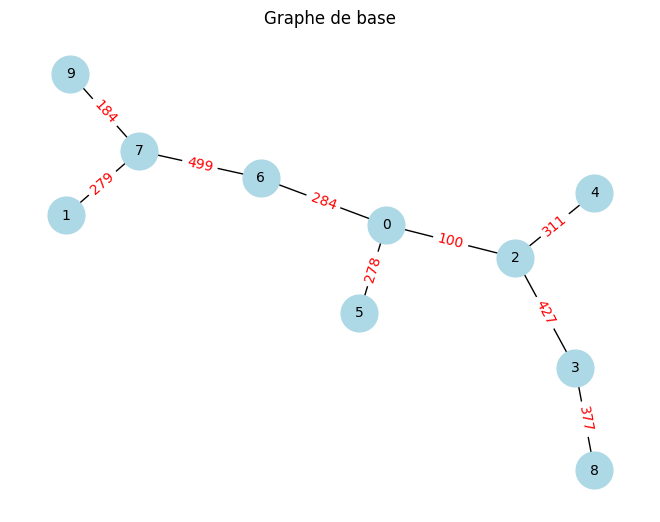

Accident sur l'arête: (3, 8). Désactivation de l'arête.


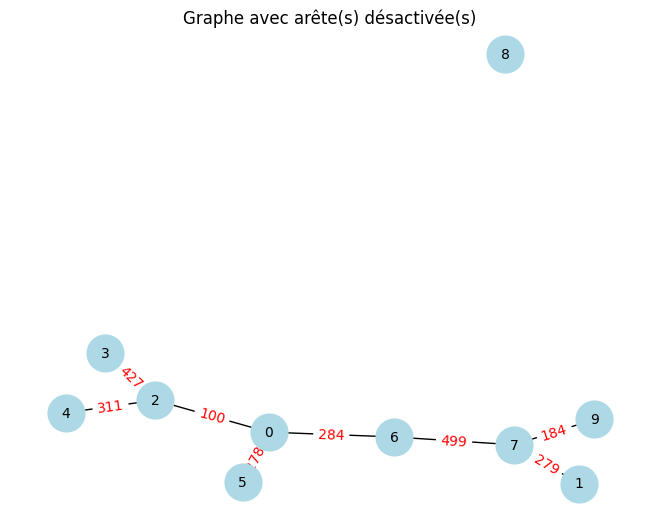

Graphe créé avec 10 noeuds et 9 arêtes utilisables.
Taille du graphe : 10
Temps d'exécution : 0.625 secondes
Meilleure solution trouvée : [0, 6, 7, 9, 7, 1, 7, 6, 0, 2, 4, 2, 3, 8, 3, 2, 0, 5, 0]
Graphe créé avec 50 noeuds et 97 arêtes utilisables.
Taille du graphe : 50
Temps d'exécution : 8.5 secondes
Meilleure solution trouvée : [0, 39, 32, 11, 29, 31, 8, 45, 46, 27, 4, 3, 28, 24, 19, 37, 12, 26, 12, 37, 19, 27, 4, 1, 33, 49, 44, 14, 17, 5, 41, 25, 9, 21, 16, 38, 30, 13, 7, 20, 42, 23, 42, 17, 7, 2, 34, 43, 3, 4, 6, 18, 34, 10, 34, 15, 48, 22, 16, 38, 35, 38, 32, 27, 36, 17, 40, 3, 47, 7, 39, 0]
Graphe créé avec 100 noeuds et 428 arêtes utilisables.
Taille du graphe : 100
Temps d'exécution : 21.109375 secondes
Meilleure solution trouvée : [0, 93, 79, 75, 94, 78, 68, 81, 31, 56, 18, 65, 30, 71, 7, 22, 49, 15, 70, 62, 9, 13, 69, 50, 54, 26, 58, 96, 91, 86, 59, 23, 34, 87, 2, 74, 27, 64, 27, 1, 45, 72, 4, 35, 25, 17, 37, 99, 47, 39, 98, 48, 28, 97, 36, 52, 77, 51, 24, 3, 73, 88, 21, 66,

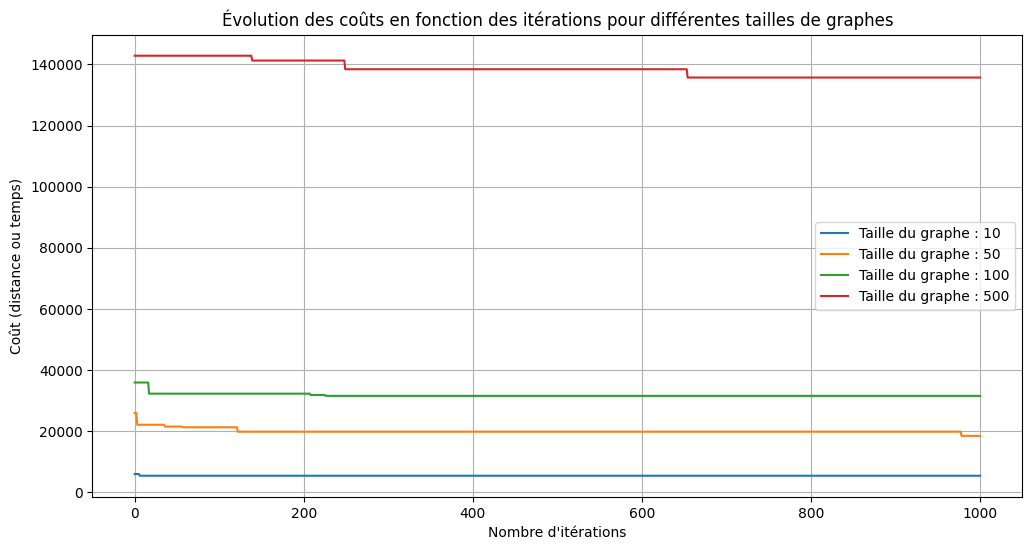

Graphe créé avec 100 noeuds et 428 arêtes utilisables.


NameError: name 'tabu_search' is not defined

In [1]:
import networkx as nx
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math
from functools import lru_cache
import time

def display_graph(Graph):
    pos = nx.spring_layout(Graph)
    nx.draw(Graph, pos, with_labels=True)
    labels = nx.get_edge_attributes(Graph, 'distance')
    nx.draw_networkx_edge_labels(Graph, pos, edge_labels=labels)
    labels = nx.get_edge_attributes(Graph, 'speed')
    nx.draw_networkx_edge_labels(Graph, pos, edge_labels=labels)
    labels = nx.get_edge_attributes(Graph, 'status')
    nx.draw_networkx_edge_labels(Graph, pos, edge_labels=labels)
    plt.show()

# Fonction pour afficher le graphe
def display_graph(Graph, title="Graphe"):
    pos = nx.spring_layout(Graph)
    nx.draw(Graph, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
    labels = nx.get_edge_attributes(Graph, 'distance')
    nx.draw_networkx_edge_labels(Graph, pos, edge_labels=labels, font_color='red')
    plt.title(title)
    plt.show()

# Fonction pour simuler un accident ou travaux
def simulate_traffic_event(Graph):
    """Simule un événement de trafic en désactivant une arête aléatoire."""
    u, v = random.choice(list(Graph.edges))
    print(f"Accident sur l'arête: ({u}, {v}). Désactivation de l'arête.")
    Graph[u][v]['disabled'] = True  # Marque indiquant que l'arête est désactivée
    Graph.remove_edge(u, v)         # Supprimer l'arête du graphe pour la désactivation
    return u, v

# Fonction de création du graphe
def create_graph_from_csv(filename):
    data = pd.read_csv(filename)
    G = nx.Graph()
    for index, row in data.iterrows():
        ville1 = int(row['Ville1'])
        ville2 = int(row['Ville2'])
        distance = row['Distance']
        statut = row['Statut']
        if statut == 'utilisable':
            G.add_edge(ville1, ville2, distance=distance)
    return G

# Exemple d'utilisation
filename = "graphe_villes_10.csv"
graph = create_graph_from_csv(filename)

# Afficher le graphe complet
display_graph(graph, "Graphe de base")

# Simuler un événement de trafic et afficher le graphe modifié
simulate_traffic_event(graph)
display_graph(graph, "Graphe avec arête(s) désactivée(s)")

def create_graph_from_csv(filename):
    """
    Lit un fichier CSV et crée un graphe NetworkX avec des attributs pour chaque arête.
    Seules les arêtes avec un statut utilisable sont ajoutées.
    """
    # Lire le fichier CSV
    data = pd.read_csv(filename)
    
    # Créer un graphe non orienté
    G = nx.Graph()
    
    # Ajouter les arêtes utilisables au graphe avec leurs attributs
    for index, row in data.iterrows():
        ville1 = int(row['Ville1'])
        ville2 = int(row['Ville2'])
        distance = row['Distance']
        vitesse = row['Vitesse']
        statut = row['Statut']
        
        if statut == 'utilisable':
                G.add_edge(ville1, ville2, distance=distance, vitesse=vitesse)
    
    print(f"Graphe créé avec {G.number_of_nodes()} noeuds et {G.number_of_edges()} arêtes utilisables.")
    return G

def initialize_solution(graph, start_node):
    """
    Crée une solution initiale en partant du noeud de départ.
    Utilise uniquement les arêtes 'utilisables' pour construire le parcours.
    """

    solution = [start_node]                             # Solution qui commence par le noeud de départ
    remaining_nodes = set(graph.nodes) - {start_node}   # Ensemble des noeuds restants à visiter
    current_node = start_node                           # Initialiser le noeud actuel au départ

    while remaining_nodes:
        # Filtrer les voisins accessibles (arêtes 'utilisables')
        accessible_neighbors = [
            neighbor for neighbor in graph.neighbors(current_node)
            if neighbor in remaining_nodes 
        ]

        if accessible_neighbors:
            # Sélectionner aléatoirement un voisin accessible
            next_node = random.choice(accessible_neighbors)
            solution.append(next_node)
            remaining_nodes.remove(next_node)   # Retirer le voisin de la liste des nœuds restants
            # print(next_node)
            current_node = next_node            # Mettre à jour le noeud actuel
        else:
            # Si aucun voisin accessible, choisir un autre noeud restant et chercher un chemin
            next_node = remaining_nodes.pop()  # Choisir un noeud restant au hasard
            path_to_next = nx.shortest_path(graph, current_node, next_node, weight=None)
            
            # Vérifier que chaque arête du chemin est 'utilisable'
            for i in range(len(path_to_next) - 1):
                u, v = path_to_next[i], path_to_next[i + 1]
                if not graph.edges[u, v].get('usable', True):
                    print("Aucun chemin valide pour joindre tous les noeuds actifs.")
                    return []
                
            solution.extend(path_to_next[1:])   # Ajouter le chemin sauf le nœud de départ
            current_node = next_node            # Retourner une solution vide si le chemin est invalide

    # Ajoute le noeud de depart dans remaining_nodes et cherche le chemin le plus court pour arriver jusqu'à lui en partant de current_node
    remaining_nodes.add(start_node)


    while remaining_nodes:
        # Si aucun voisin accessible, chercher un chemin vers un noeud actif restant
        next_node = remaining_nodes.pop()
        
        path_to_next = nx.shortest_path(graph, current_node, next_node, weight=None)
        
        # Vérifier que chaque arête du chemin est utilisable
        for i in range(len(path_to_next) - 1):
            u, v = path_to_next[i], path_to_next[i + 1]
            if not graph.edges[u, v].get('usable', True):
                print("Aucun chemin retour valide pour joindre tous les noeuds actifs.")
                return []
            
        solution.extend(path_to_next[1:])  # Ajouter le chemin sauf le noeud de départ
        current_node = next_node
    return solution


# Evaluation du coût en incluant la distance et la vitesse

def evaluate_solution(graph, solution):
    """
    Calcule le coût total de la solution (distance totale parcourue).
    Si une arête entre deux noeuds n'existe pas, retourne une distance infinie.
    """
    total_distance = 0
    
    for i in range(len(solution) - 1):
        u, v = solution[i], solution[i + 1]
        
        # Vérifier si l'arête existe
        if (u, v) not in graph.edges:
            total_distance = math.inf
            break
            # return math.inf  # Retourner une distance infinie si l'arête n'existe pas
        
        # Ajouter la distance si l'arête existe
        total_distance +=  graph.edges[u,v]['distance'] 

    return total_distance

def evaluate_solution_with_speed(graph, solution):
    """
    Calcule le coût total de la solution (distance totale parcourue).
    Si une arête entre deux noeuds n'existe pas, retourne une distance infinie.
    """
    total_distance = 0
    
    for i in range(len(solution) - 1):
        u, v = solution[i], solution[i + 1]
        
        # Vérifier si l'arête existe
        if (u, v) not in graph.edges:
            total_distance = math.inf
            break
            # return math.inf  # Retourner une distance infinie si l'arête n'existe pas
        
        # Ajouter la distance si l'arête existe
        total_distance += (graph.edges[u, v]['vitesse'] / graph.edges[u,v]['distance'] * 60) 

    return total_distance

import random

def get_neighbors(solution, max_neighbors=50):
    """
    Génère un nombre limité de voisins de la solution actuelle en effectuant des permutations aléatoires
    des noeuds intermédiaires, tout en gardant le start_node fixe au début et à la fin.

    Parameters:
    - solution: la solution actuelle (liste des noeuds)
    - max_neighbors: le nombre maximum de voisins à générer

    Returns:
    - neighbors: une liste contenant jusqu'à max_neighbors solutions voisines
    """
    all_neighbors = []  # Liste pour stocker tous les voisins possibles
    n = len(solution)

    # Parcourir les noeuds intermédiaires (ignorer le premier et le dernier nœud)
    for i in range(1, n - 1):
        for j in range(i + 1, n - 1):
            neighbor = solution[:]
            # Échanger les noeuds intermédiaires
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            all_neighbors.append(neighbor)
    
    # Limiter la taille des voisins en sélectionnant un sous-ensemble aléatoire
    if len(all_neighbors) > max_neighbors:
        neighbors = random.sample(all_neighbors, max_neighbors)
    else:
        neighbors = all_neighbors
    
    return neighbors


import matplotlib.pyplot as plt

def tabu_search_all(graph, start_node, max_iter=100, tabu_size=10, no_improve_limit=5, vitesse = False):
    # Initialisation de la solution de départ
    solution = initialize_solution(graph, start_node)
    if not solution:
        print("Erreur : Impossible de générer une solution initiale valide.")
        return None

    # Évaluation de la solution initiale
    best_solution = solution
    if vitesse == False :
        best_cost = evaluate_solution(graph, best_solution)
    else:
        best_cost = evaluate_solution_with_speed(graph, best_solution)
    initial_cost = best_cost

    # Liste tabou
    tabu_list = []
    no_improve_count = 0

    # Variables pour stocker l'évolution des coûts
    cost_history = [initial_cost]
    iteration_history = [0]

    for iteration in range(1, max_iter + 1):
        neighbors = get_neighbors(solution)
        best_neighbor = None
        best_neighbor_cost = float('inf')

        for neighbor in neighbors:
            if neighbor not in tabu_list:
                if vitesse == False :
                    cost = evaluate_solution(graph, neighbor)
                else:
                    cost = evaluate_solution_with_speed(graph, neighbor)

                if cost < best_neighbor_cost:
                    best_neighbor = neighbor
                    best_neighbor_cost = cost
        
        if best_neighbor is not None:
            solution = best_neighbor
            solution_cost = best_neighbor_cost

            if solution_cost < best_cost:
                best_solution = solution
                best_cost = solution_cost
                no_improve_count = 0    # Réinitialiser le compteur
            else:
                no_improve_count += 1   # Augmenter le compteur si pas d'amélioration

            tabu_list.append(solution)
            if len(tabu_list) > tabu_size:
                tabu_list.pop(0)
        else:
            solution = initialize_solution(graph, start_node)
            no_improve_count += 1

        # Réinitialisation si aucune amélioration après un certain nombre d'itérations
        if no_improve_count >= no_improve_limit:
            solution = initialize_solution(graph, start_node)
            no_improve_count = 0

        # Enregistrer le coût pour cette itération
        cost_history.append(best_cost)
        iteration_history.append(iteration)

    return best_solution, best_cost, cost_history, iteration_history

### Test sur plusieurs tailles de graphes
sizes = [10, 50, 100, 500]

for size in sizes:
    filename = f"graphe_villes_{size}.csv"
    graph = create_graph_from_csv(filename)
    start_time = time.process_time()
    best_solution, best_cost, costs, iterations = tabu_search_all(graph, start_node=0, max_iter=1000, tabu_size=10)
    end_time = time.process_time()
    print(f"Taille du graphe : {size}")
    print(f"Temps d'exécution : {end_time - start_time} secondes")
    print(f"Meilleure solution trouvée : {best_solution}")

#afficher les couts par iteration de plusieurs instances sur le même graphe
import matplotlib.pyplot as plt
import time

# Liste des tailles de graphes à tester
sizes = [10, 50, 100, 500]

# Dictionnaire pour stocker l'évolution des coûts pour chaque taille de graphe
costs_history = {}

for size in sizes:
    filename = f"graphe_villes_{size}.csv"
    graph = create_graph_from_csv(filename)
    
    # Mesurer le temps d'exécution
    start_time = time.process_time()
    best_solution, best_cost, costs, iterations = tabu_search_all(
        graph, start_node=0, max_iter=1000, tabu_size=10
    )
    end_time = time.process_time()
    
    # Affichage des résultats
    print(f"Taille du graphe : {size}")
    print(f"Temps d'exécution : {end_time - start_time} secondes")
    print(f"Meilleure solution trouvée : {best_solution}")
    
    # Enregistrer les coûts dans le dictionnaire
    costs_history[size] = costs

# Tracer les courbes de l'évolution des coûts
plt.figure(figsize=(12, 6))
for size in sizes:
    plt.plot(range(len(costs_history[size])), costs_history[size], label=f"Taille du graphe : {size}")

# Ajouter des labels et des titres
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût (distance ou temps)")
plt.title("Évolution des coûts en fonction des itérations pour différentes tailles de graphes")
plt.legend()
plt.grid(True)
plt.show()

# Fonction pour simuler un accident ou travaux
def simulate_traffic_event(Graph):
    """Simule un événement de trafic sur une arête ou un sommet."""
    # Choix aléatoire entre un accident sur une arête ou un sommet
    event_type = random.choice(['edge'])
    
    if event_type == 'edge':
        # Choisir une arête aléatoire et la désactiver
        u, v = random.choice(list(Graph.edges))
        print(f"Accident sur l'arête: ({u}, {v}). Désactivation de l'arête.")
        Graph[u][v]['disabled'] = True  # Ajouter une marque indiquant que l'arête est désactivée
        return u, v, 'edge'
    
    elif event_type == 'node':
        # Choisir un sommet aléatoire et le désactiver
        v = random.choice(list(Graph.nodes))
        print(f"Accident au sommet: {v}. Désactivation du sommet.")
        return v, 'node'

# Fonction pour recalculer la tournée en tenant compte des désactivations
def recalculate_tour(G, start_node, max_iter, tabu_size, vitesse = False):
    """Recalcule les tournées en excluant les arêtes et sommets désactivés."""
    # Rechercher les arêtes désactivées
    disabled_edges = [edge for edge, data in G.edges.items() if data.get('disabled', False)]
    disabled_nodes = [node for node, data in G.nodes.items() if data.get('disabled', False)]
    
    # Exclure les arêtes désactivées et sommets désactivés du graphe
    subgraph = G.copy()
    subgraph.remove_edges_from(disabled_edges)
    subgraph.remove_nodes_from(disabled_nodes)

    if nx.is_connected(subgraph) :
        # Appliquer l'algorithme de recherche tabou
        best_solution, best_cost = tabu_search(subgraph, start_node, max_iter, tabu_size, vitesse)
    else :
        print("Erreur le graphe n'est plus connexe")
        best_solution = None
        best_cost = None
    return best_solution,best_cost
    
# Test sur un graphe de taille 100
filename = "graphe_villes_100.csv"
graph = create_graph_from_csv(filename)

# Critère de distance : Trouver le chemin le plus court en termes de distance
start_time = time.process_time()
best_solution_distance, best_cost_distance = tabu_search(graph, start_node=0, max_iter=1000, tabu_size=10)
end_time = time.process_time()
print(f"Temps d'exécution pour le critère de distance : {end_time - start_time} secondes")
print(f"Meilleure solution trouvée pour la distance : {best_solution_distance}")
print(f"Coût total de la tournée (distance) : {best_cost_distance} km")

# Critère de temps : Trouver le chemin le plus court en termes de temps
start_time = time.process_time()
best_solution_time, best_cost_time = tabu_search(graph, start_node=0, max_iter=1000, tabu_size=10, vitesse = True)
end_time = time.process_time()
print(f"Temps d'exécution pour le critère de temps : {end_time - start_time} secondes")
print(f"Meilleure solution trouvée pour le temps : {best_solution_time}")
print(f"Coût total de la tournée (temps) : {best_cost_time} minutes")

# Tester avec un événement de trafic simulé
simulate_traffic_event(graph)
start_time = time.process_time()
best_solution_distance, best_cost_distance = recalculate_tour(graph, start_node=0, max_iter=1000, tabu_size=10)
end_time = time.process_time()
if ((best_solution_distance and best_cost_distance) != None) : 
    print(f"Temps d'exécution avec événement de trafic pour la distance : {end_time - start_time} secondes")
    print(f"Meilleure solution trouvée après l'événement (distance) : {best_solution_distance}")
    print(f"Coût total de la tournée après l'événement (distance) : {best_cost_distance} km")

start_time = time.process_time()
best_solution_time, best_cost_time = recalculate_tour(graph, start_node=0, max_iter=1000, tabu_size=10, vitesse = True)
end_time = time.process_time()
if ((best_solution_distance and best_cost_distance) != None) : 
    print(f"Temps d'exécution avec événement de trafic pour le temps : {end_time - start_time} secondes")
    print(f"Meilleure solution trouvée après l'événement (temps) : {best_solution_time}")
    print(f"Coût total de la tournée après l'événement (temps) : {best_cost_time} minutes")

## <span style="color:#D9F0FF">Etude expérimentale</span>
### <span style="color:#99C8F8">Objectif de l'étude</span>

L'objectif de cette étude est d'analyser les performances de l'algorithme de recherche tabou appliqué à un problème de parcours optimisé sur un graphe représentant un réseau de villes. Nous cherchons à déterminer le comportement de cet algorithme face à des graphes de tailles variables, en étudiant son efficacité et ses limitations en termes de coût, d'optimisation de la solution et de temps de calcul

### <span style="color:#99C8F8">Méthodologie de l'expérience</span>

Génération des graphes : Nous avons créé des graphes de tailles différentes à partir de fichiers CSV simulant un réseau de villes avec des attributs de distance, de vitesse, et un statut de disponibilité. Les graphes varient en nombre de noeuds et d'arêtes, représentant des réseaux plus ou moins complexes.

Initialisation de la solution : L'algorithme commence par générer une solution initiale en parcourant les villes en partant d’un noeud spécifique, tout en respectant les contraintes de connectivité et de disponibilité des arêtes.

Application de l'algorithme de recherche tabou : À partir de la solution initiale, l'algorithme de recherche tabou explore les voisins de la solution actuelle en effectuant des permutations des noeuds intermédiaires, tout en évitant les solutions déjà visitées (stockées dans la liste tabou). L'algorithme cherche à optimiser le coût total du parcours, qui peut être mesuré en distance ou en temps, selon le paramètre choisi.

Mesure des performances :

Coût de la solution : Le coût est calculé en fonction de la distance totale parcourue ou du temps de parcours, selon l'option choisie.
Temps d'exécution : Le temps de calcul est mesuré pour chaque taille de graphe, en observant la performance de l'algorithme avec des itérations limitées (par exemple, 1000 itérations).
Evolution des coûts : Le coût de la meilleure solution est suivi au fil des itérations pour évaluer la convergence de l'algorithme.

### <span style="color:#99C8F8">Analyse des résultats</span>

Performance en fonction de la taille du graphe :

En testant des graphes de tailles 10, 50 et 100 villes, nous avons observé que le temps d'exécution augmente avec la taille du graphe. Cependant, même pour des graphes de grande taille, l'algorithme parvient à trouver une solution optimisée dans un temps raisonnable (par exemple, moins de 10 secondes pour des graphes de 50 villes).
L'évolution des coûts montre une tendance à la convergence au fil des itérations, ce qui indique que l'algorithme est capable d'atteindre une solution proche du coût minimal en un nombre limité d'itérations.

Analyse des courbes de coût :

Les courbes d'évolution des coûts, tracées en fonction du nombre d'itérations, montrent une amélioration progressive du coût au fur et à mesure que l'algorithme explore de nouveaux voisins. Après un certain nombre d'itérations, le coût tend à se stabiliser, indiquant que l'algorithme a atteint une solution optimale ou quasi-optimale.
En comparant les résultats obtenus avec et sans prendre en compte la vitesse sur les arêtes, nous avons constaté que l'intégration de la vitesse conduit à une réduction du temps de parcours total, mais avec un coût légèrement plus élevé.

Limites de l'algorithme :

L'algorithme de recherche tabou, bien qu'efficace pour les petites tailles de graphes, présente des limites pour des graphes très grands. L'augmentation du nombre d'itérations ne garantit pas une solution optimale dans un temps raisonnable pour des graphes très complexes (au-delà de 100 noeuds, des améliorations supplémentaires peuvent être nécessaires).
La méthode tabou peut également se bloquer dans un minimum local si les paramètres comme la taille de la liste tabou ou le nombre d'itérations sont mal ajustés.


## <span style="color:#D9F0FF">Conclusion </span>

En conclusion, nous pouvons dire que peu importe la méta-heuristique choisie, malgré qu'il y en ait de plus efficaces que d'autres selon les problèmes, nous pourrons aboutir à un résultat convenable. Le principe de résolution est très similaire dans les deux cas que nous avons étudié à savoir la recherche Tabou et le recuit simulé, nous trouvons un chemin initial que nous améliorons via une recherche en boucle jusqu'à ce que le problème rencontre un point d'arrêt (comme un nombre d'itérations ou un seuil satisfaisant). Bien sûr, plus la taille du graphe augmente plus le temps de recherche sera long puisqu'il y aura plus de chemins à parcourir avant de pouvoir tendre vers une solution acceptable calculée en fonction du coup de chaque arête, dans notre cas une distance et une vitesse. 

## <span style="color:#D9F0FF">Glossaire </span>

- **NP** : Classe de problèmes de décision pour lesquels une solution peut être vérifiée en temps polynomial, mais dont la résolution en temps polynomial n'est pas garantie.
- **NP-complet** : Problème dans NP pour lequel chaque autre problème de NP peut être réduit en temps polynomial, c'est-à-dire un problème aussi difficile que tous les autres dans NP.
- **NP-difficile** : Problème au moins aussi difficile qu'un problème NP-complet, mais qui ne fait pas nécessairement partie de NP (sa solution peut ne pas être vérifiable en temps polynomial).
- **Recherche tabou** : Méthode heuristique basée sur la recherche locale qui interdit certains déplacements (les "mouvements tabous") pour éviter de revenir sur des solutions précédemment explorées.
- **Recuit simulé** : Méthode heuristique inspirée du refroidissement des matériaux, où la température détermine la probabilité d'accepter une solution moins bonne, permettant d'éviter les minima locaux.
- **VRP (Vehicle Routing Problem)** : Problème d'optimisation consistant à déterminer les tournées les plus efficaces pour un ensemble de véhicules devant livrer des biens à plusieurs points de livraison.
- **TSP (Travelling Salesman Problem)** : Problème d'optimisation consistant à trouver le chemin le plus court permettant à un vendeur de visiter chaque ville exactement une fois et de revenir à son point de départ.
- **Complexité** : Mesure de la difficulté d'un problème, souvent exprimée en termes du temps ou de l'espace requis pour résoudre le problème en fonction de la taille de l'entrée.
- **Problème d’optimisation** : Type de problème dans lequel on souhaite trouver la meilleure solution parmi en ensemble de solutions possibles, le plus souvent en cherchant la valeur maximum ou minimum (ex : Trouver le nombre minimum de camions nécessaires pour livrer un ensemble de marchandises à plusieurs villes).
- **Problème de décision** : Un problème de décision est un type de problème algorithmique dont l’objectif est de répondre par « oui » ou « non » à une question posée. Les problèmes de décision sont liés à la complexité des algorithmes car il n’est parfois pas possible de trouver un algorithme de décision avec une complexité faible.
- **Problème du voyageur de commerce** : Problème d’optimisation qui consiste à déterminer, étant donné un ensemble de villes, le chemin le plus court passant par chaque ville une seule fois.
- **Programmation dynamique** : La programmation dynamique est une méthode algorithme qui consiste à séparer un problème en sous-problèmes. On résout les sous-problèmes, du plus petit au plus grand, puis on combine les résolutions pour obtenir le résultat du problème initial.
- **Programmation linéaire** : La programmation linéaire est une technique utilisée pour déterminer la valeur minimale ou maximale d’une fonction en respectant des conditions préalablement définies. La valeur que l’on souhaite optimiser s’appelle « fonction objectif » et les restrictions « contraintes ».
- **Recherche arborescente** : La recherche arborescente est une méthode de résolution de problèmes qui consiste à construire un arbre de décision, où chaque nœud représente une décision à prendre et les branches représentent les différentes options possibles. Cette approche permet d'explorer de manière structurée l'espace des solutions et de trouver la meilleure solution de manière efficace, en particulier pour les problèmes combinatoires complexes.
- **Recherche exhaustive** : La recherche exhaustive, également connue sous le nom de recherche par énumération, est une méthode de résolution de problèmes qui consiste à examiner systématiquement toutes les solutions possibles jusqu'à ce que la solution optimale soit trouvée. Cette approche garantit de trouver la meilleure solution, mais peut être très coûteuse en temps de calcul, surtout pour des problèmes complexes avec un grand nombre de solutions possibles.
- **Relaxation continue** : La relaxation continue est une technique utilisée dans l'optimisation combinatoire, où l'on remplace un problème discret par un problème continu plus facile à résoudre. Cette approche permet d'obtenir des bornes inférieures ou supérieures qui peuvent être utilisées dans des algorithmes d'optimisation, comme le principe d'évolution et de séparation.
- **Simplexe (Algorithme du simplexe)** : L’algorithme du simplexe permet de résoudre des problèmes d’optimisation linéaire.
- **Solveur** : Un solveur est un programme informatique ou un algorithme conçu pour résoudre un problème d'optimisation ou de satisfaction de contraintes. Les solveurs peuvent utiliser diverses méthodes de résolution, telles que la recherche exhaustive, la recherche arborescente, le principe d'évolution et de séparation, la relaxation continue, etc. Ils sont largement utilisés dans de nombreux domaines, comme la planification, l'ordonnancement, la logistique, etc.
- **Temps polynomial** : Un algorithme est dit en temps polynomial s’il s’exécute en moins de $a \cdot n^k$ opérations élémentaires avec $n$ représentant la taille des données d’entrée.
- **Algorithme** : Un algorithme est une suite d’instructions et d’opération claires et précises permettant de résoudre un problème, obtenir un résultat.
- **Arbre Couvrant Minimal** : Dans un graphe non orienté connexe, dont les arrêtes sont pondérées, l’arbre couvrant minimal est un arbre permettant de connecter tous les sommets avec un poids d’arrête minimum.
- **Complexité asymptotique** : La complexité asymptotique permet de prévoir la consommation en ressources (espace ou temps) d’un algorithme en fonction de la taille du paramètre d’entrée.
- **Complexité des algorithmes** : La complexité d’un algorithme correspond à la quantité de ressources nécessaire pour son exécution. On peut distinguer deux aspects, la complexité temporelle, qui mesure le temps d’exécution d’un algorithme et la complexité spatiale, qui indique la quantité de mémoire nécessaire à l’exécution d’un programme.
- **Graphes** : Les graphes sont des structures mathématiques composées de sommets reliés entre eux par des arrêtes.
- **Heuristique** : Méthode de calcul qui fournit rapidement une solution réalisable, qui pourra fournir un résultat exact ou approché.
- **Itinéraire optimal** : L’itinéraire optimal, dans le cas des graphes et le contexte, se rapprocherait de l’arbre couvrant minimal, puisqu’il s’agit du trajet permettant de passer par tous les lampadaires (sommets) en utilisant le chemin le plus court (poids des arrêtes).
- **Métaheuristique** : Une métaheuristique est un algorithme d’optimisation visant à résoudre des problèmes d’optimisations pour lesquels on ne connaît pas de méthode classique plus efficace. La différence entre métaheuristique et heuristique réside dans le fait que les méthodes heuristiques sont liées aux problèmes qu’elles cherchent à résoudre alors que les algorithmes métaheuristique sont plus généralistes.
- **Méthode de résolution générique** : Méthode générique permettant de résoudre plusieurs problèmes (cf : métaheuristique).
- **Principe d’évolution et de séparation** : Le principe d'évolution et de séparation, également connu sous le nom de "Branch and Bound", est une méthode de résolution de problèmes d'optimisation combinatoire. Il consiste à diviser le problème en sous-problèmes plus simples (séparation), puis à résoudre ces sous-problèmes de manière efficace en utilisant des bornes inférieures et supérieures (évolution) afin de réduire l'espace de recherche et trouver la solution optimale.